# Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Инструкция по выполнению проекта
**Шаг 1**. Откройте файл с данными и изучите общую информацию
Путь к файлу: /datasets/games.csv. Скачать датасет

**Шаг 2**. Подготовьте данные
Замените названия столбцов (приведите к нижнему регистру);
Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
Обработайте пропуски при необходимости:
Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
Опишите причины, которые могли привести к пропускам;
Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

**Шаг 3**. Проведите исследовательский анализ данных
Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не учитывайте в работе данные за предыдущие годы.
Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
Соотнесите выводы с продажами игр на других платформах.
Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

**Шаг 4**. Составьте портрет пользователя каждого региона
Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишите различия в долях продаж.
Самые популярные жанры (топ-5). Поясните разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?

**Шаг 5**. Проверьте гипотезы
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Задайте самостоятельно пороговое значение alpha.
Поясните:
Как вы сформулировали нулевую и альтернативную гипотезы;
Какой критерий применили для проверки гипотез и почему.

**Шаг 6**. Напишите общий вывод
Оформление: Выполните задание в Jupyter Notebook. Заполните программный код в ячейках типа code, текстовые пояснения — в ячейках типа markdown. Примените форматирование и заголовки.

# Описание данных
Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

# Изучение данных

## Импорт библиотек, изучение датафрейма 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
from datetime import datetime
from scipy import stats as st

In [2]:
df = pd.read_csv('/datasets/games.csv')
df.info()
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## Предобработка датасета

### Заполнение пропусков, изменение типа данных

In [3]:
df.columns=['name','platform','year_of_release','genre','na_sales','eu_sales',
            'jp_sales','other_sales','critic_score','user_score','rating']

In [4]:
display(df.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Дропнем часть строк с пропусками в названии игр. Их доля незначительная, и их удаление не приведет к искажению результата анализа. 

Заменим пропуски в году выхода на среднее значение года выпуска по названию игры (игры наверняка выходили на нескольких платформах с небольшой разницей по времени). Строки с оставшимися пропусками в году выхода дропнем. 

Изменим тип данных **year_of_release** на целочисленные - так с ними будет удобнее работать, а памяти они будут занимать меньше. 

In [5]:
df = df.dropna(subset=['name']) 
df['year_of_release']=df['year_of_release'].fillna(df.groupby('name')['year_of_release'].transform('median'))
df = df.dropna(subset=['year_of_release']) 
df['year_of_release'] = df['year_of_release'].astype('int')
df.reset_index(drop=True, inplace=True)

In [6]:
display(df.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16567 entries, 0 to 16566
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       9934 non-null   object 
 10  rating           9868 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


Датасет выглядит акууратнее. 

In [8]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 13.])

Заменим пропуски в **critic_score** средней оценкой по названию игры. 

In [9]:
df['critic_score']=df['critic_score'].fillna(df.groupby('name')['critic_score'].transform('median'))

In [10]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В списке есть оценка **tbd** (to be done), означающая, что оценки пока нет. 

Заменим на nan, чтобы со значениями в колонке можно было работать. 

Изменим тип данных с **object** на **float**. Заполним пропуски средним по названию игры. 

In [11]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)

In [12]:
df['user_score'] = df['user_score'].astype('float')

In [13]:
df['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [14]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Пропуски в **rating** оставляем незаполненными - не выявлено закономерностей для адекватного заполнения пропусков.  

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16567 entries, 0 to 16566
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     9035 non-null   float64
 9   user_score       7540 non-null   float64
 10  rating           9868 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


### Удаление дубликатов

In [16]:
print('Дубликатов в таблице:', df.duplicated().sum())

Дубликатов в таблице: 0


### Добавление данных

In [17]:
df['sum_sales']=df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']

In [18]:
display(df.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [19]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Приведем названия платформ к единому регистру

In [20]:
df['platform']=df['platform'].str.lower()

## Исследовательский анализ данных

### Плотность выхода игр по годам

Построим гистограмму количества игр, вышедших в разные годы.

Text(0.5, 1.0, 'Количество игр по годам')

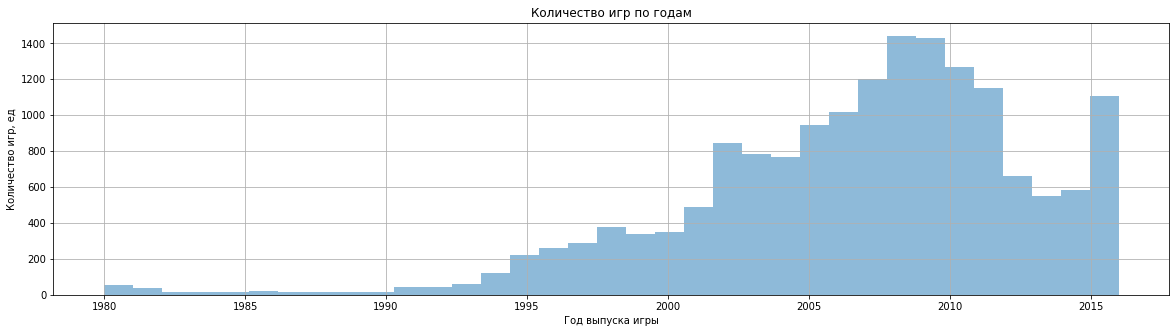

In [21]:
df['year_of_release'].hist(bins=35, figsize = (20,5), alpha = 0.5)
pl.xlabel('Год выпуска игры')
pl.ylabel('Количество игр, ед')
plt.title('Количество игр по годам')

Обратить внимание: расцвет индустрии пришелся на 90-е, а настоящий бум - на 2009-2010, после чего произошел небольшой спад с последующим повторным увеличением количества выпускаемых игр. 

**Обратить внимание** расцвет некоторых жанров/ платформ мог приходиться на разные периоды жизни индустрии. 

In [22]:
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [23]:
display(df['platform'].value_counts().head(10))

ps2     2140
ds      2129
ps3     1320
wii     1301
x360    1250
psp     1203
ps      1190
pc       970
xb       817
gba      813
Name: platform, dtype: int64

### Популярные платформы (за все время наблюдений)

Изучим наиболее популярные платформы (за все время наблюдений).

Text(0, 0.5, 'Продажи, млн копий')

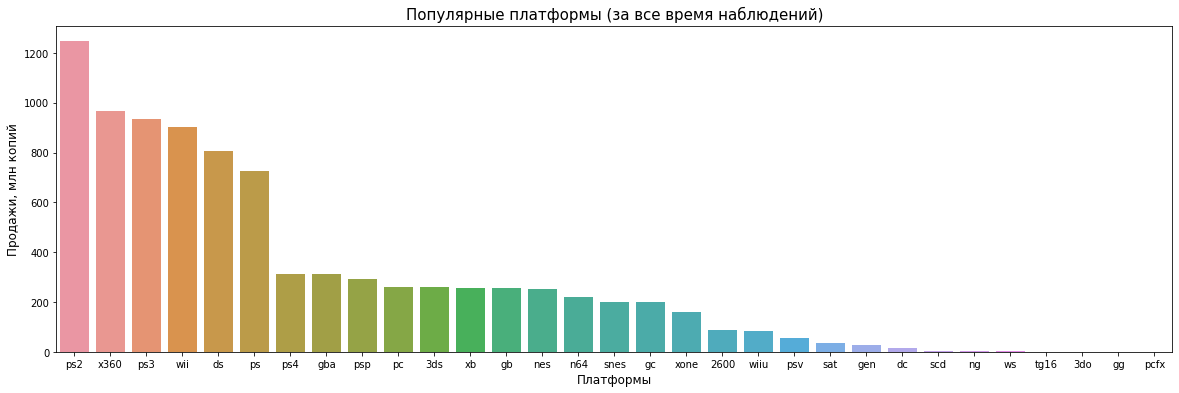

In [24]:
top_platforms = df.pivot_table(index='platform', values='sum_sales', aggfunc='sum').sort_values(
    by='sum_sales', ascending=False).reset_index().rename_axis(None, axis=1)


plt.figure(figsize=(20,6))
plt.title('Популярные платформы (за все время наблюдений)',fontsize=15)
sns.barplot(data=top_platforms, x='platform', y='sum_sales')
plt.xlabel('Платформы',fontsize=12)
plt.ylabel('Продажи, млн копий',fontsize=12)

Можно выделить 6 платформ, на которых было продано наибольшее число копий (за все время наблюдений), а именно: ps2, x360, ps3, wii, ds, ps. 

Изучим датасет более внимательно, чтобы определить жизненный цикл платформы и период актуальности платформы. 

In [25]:
top6 = df.pivot_table(index=['platform','year_of_release'], values='sum_sales', aggfunc='sum').reset_index().rename_axis(None, axis=1)
display(top6.head())

,platform,year_of_release,sum_sales
0,2600,1980,11.38
1,2600,1981,35.68
2,2600,1982,28.88
3,2600,1983,5.84
4,2600,1984,0.27


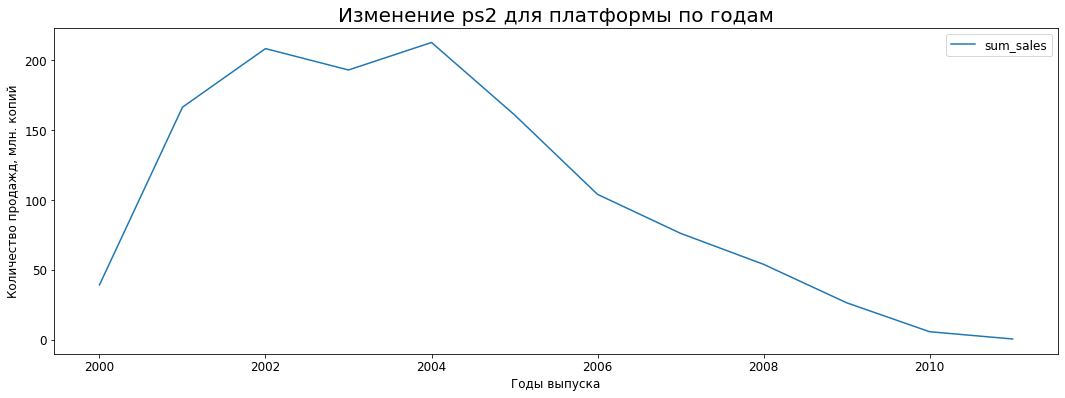

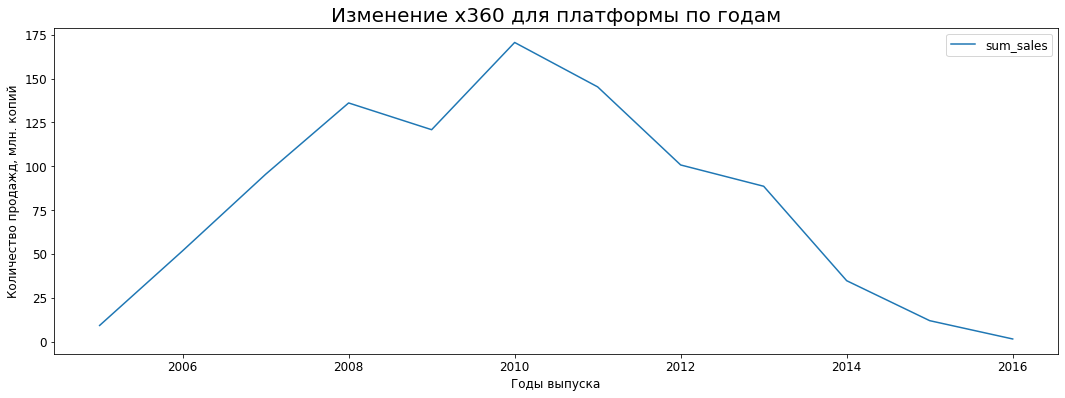

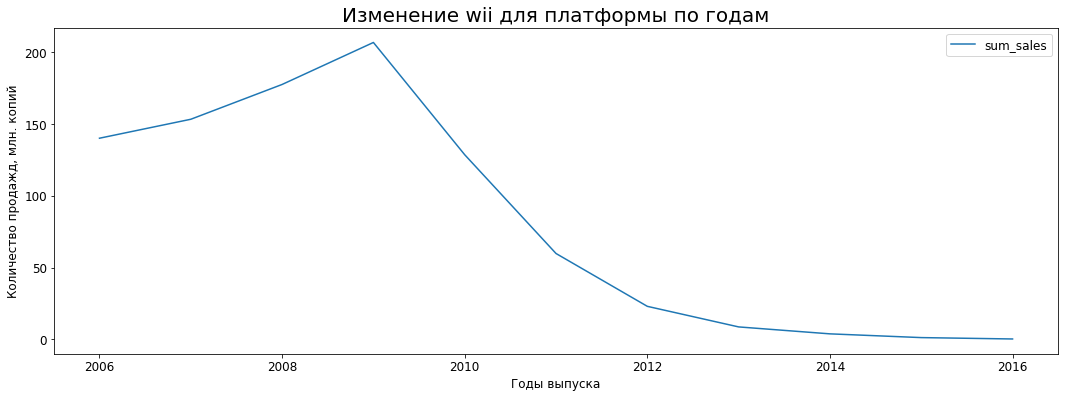

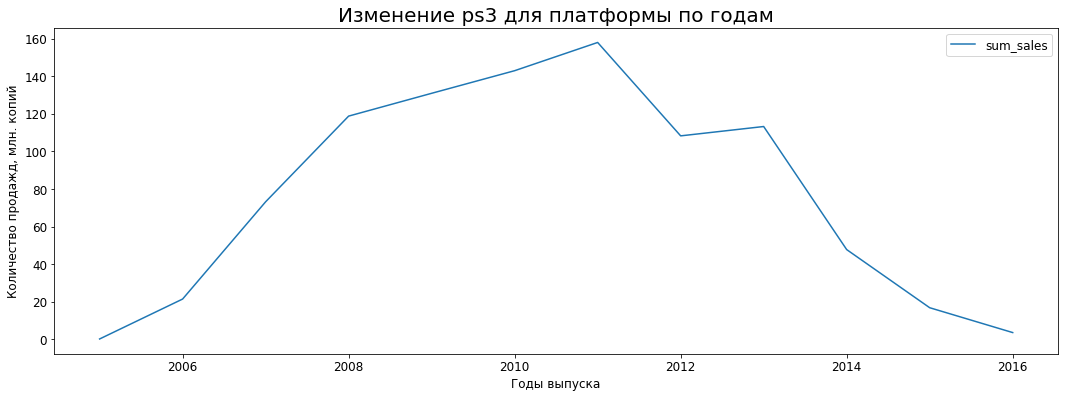

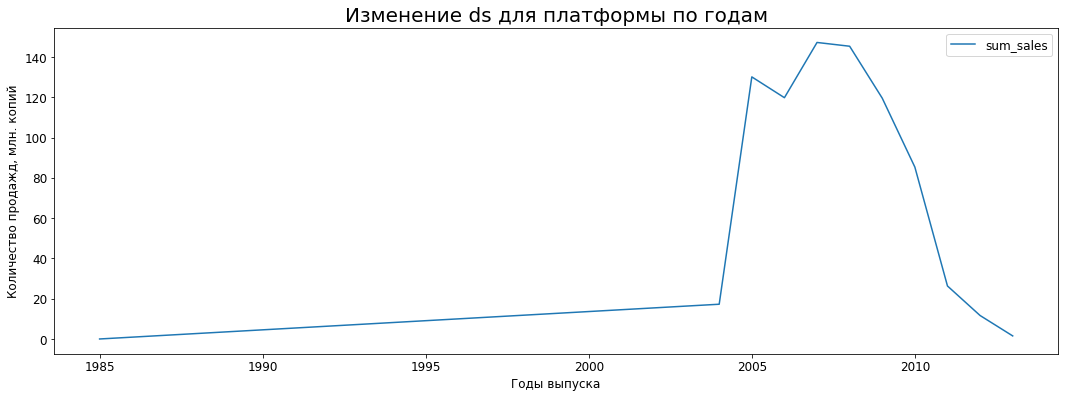

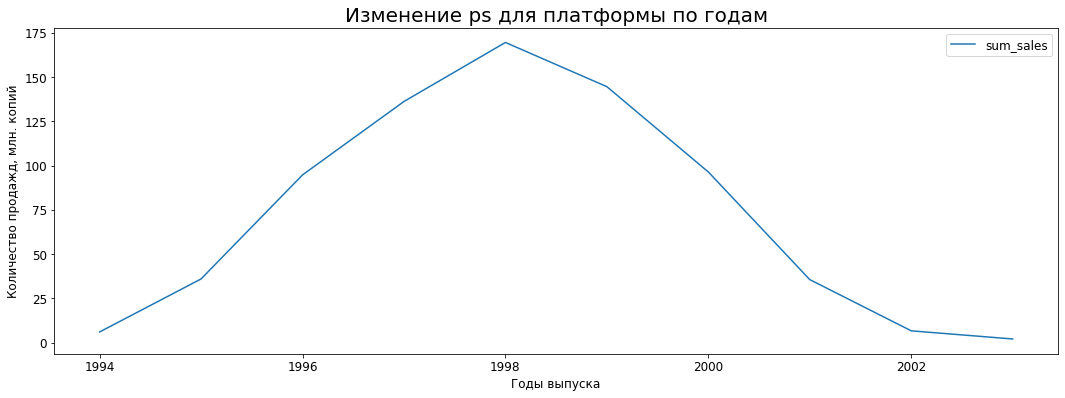

In [26]:
top_platform = ['ps2','x360','wii','ps3','ds','ps']

for each_platform in top_platform:
    top6[top6['platform'] == each_platform].plot(x="year_of_release", y="sum_sales", figsize = (18, 6))
 
    plt.title(f'Изменение {each_platform} для платформы по годам', fontsize=20)
    plt.xlabel('Годы выпуска', fontsize=12)
    plt.ylabel('Количество продажд, млн. копий', fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12)
    plt.show()

### Жизненный цикл платформы и период актуальности

Визуально мы определили примернй жизненный цикл платформы и период актуальности. Посчитаем среднее. 

In [27]:
lifecycle_period = ((2010-2000)+(2016-2005)+(2012-2005)+(2016-2005)+(2010-2004)+(2002-1994))/6
print('Жизненный цикл платформы -', round(lifecycle_period), 'лет')
actuality_period = ((2006-2002)+(2012-2008)+(2010-2008)+(2013-2008)+(2010-2005)+(2000-1996))/6
print('Актуальный период платформы -', round(actuality_period), 'года')

Жизненный цикл платформы - 9 лет
Актуальный период платформы - 4 года


### Топ актуальных платформ

Рассмотрим только игры, вышедшие в период актуальности платформы (то есть с 2012 по 2016).

Проверим, какие платформы наиболее успешны в плане количества продаж в период актуальности платформы. 

In [28]:
still_actual = df.query(
    '(year_of_release >= (2016-4) and year_of_release <=2016)'
)
top_actual_sum = still_actual.pivot_table(index='platform', values='sum_sales', aggfunc='sum').reset_index().sort_values(
    by='sum_sales', ascending=False).reset_index()

In [29]:
display(top_actual_sum)

,index,platform,sum_sales
0,4,ps4,314.14
1,3,ps3,289.71
2,9,x360,237.52
3,0,3ds,195.01
4,10,xone,159.32
5,8,wiiu,82.19
6,2,pc,63.51
7,6,psv,49.18
8,7,wii,36.60
9,1,ds,13.21


Text(0, 0.5, 'Продажи')

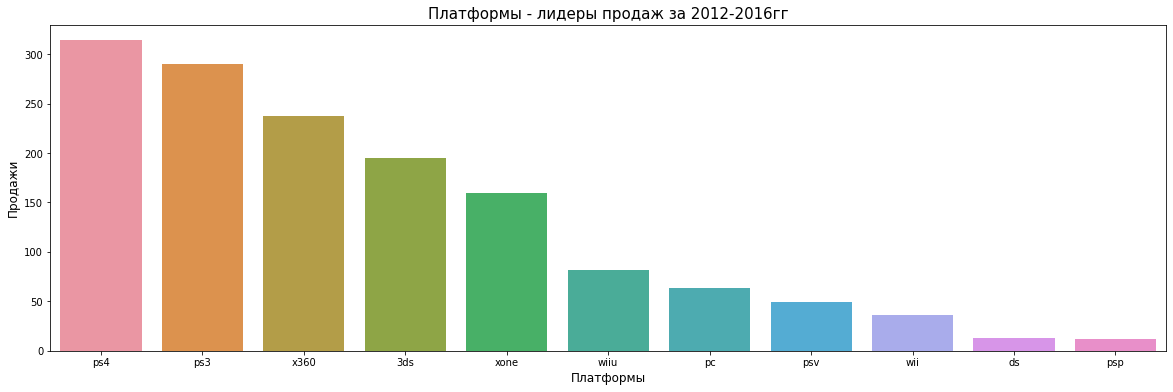

In [30]:
plt.figure(figsize=(20,6))
plt.title('Платформы - лидеры продаж за 2012-2016гг',fontsize=15)
sns.barplot(data=top_actual_sum, x='platform', y='sum_sales')
plt.xlabel('Платформы',fontsize=12)
plt.ylabel('Продажи',fontsize=12)

В период актуальности платформы лидеры среди платформ сменились: особенно успешно себя показали ps4, ps3, x360, 3ds, xone и wiiu.

Text(0, 0.5, 'Количество продажд, млн. копий')

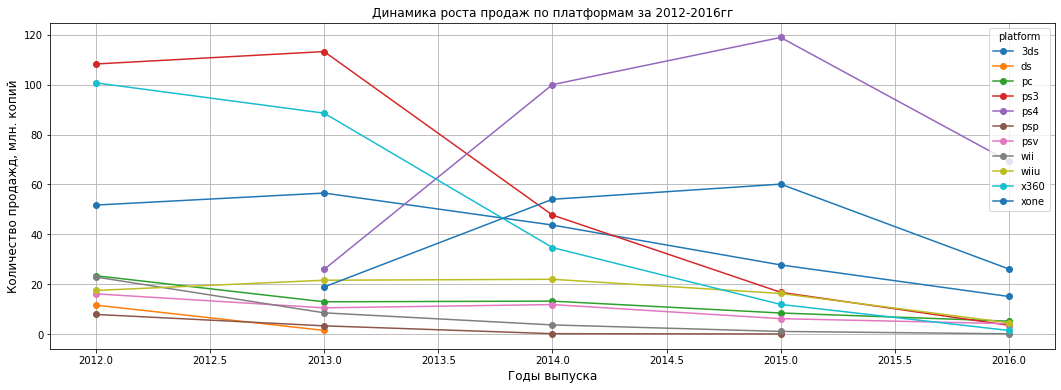

In [31]:
(
   still_actual.pivot_table(index='year_of_release', columns='platform', values = 'sum_sales', aggfunc = 'sum')
    .plot(style = 'o-',grid = True, figsize = (18,6))
    .set_title('Динамика роста продаж по платформам за 2012-2016гг')
)
plt.xlabel('Годы выпуска', fontsize=12)
plt.ylabel('Количество продажд, млн. копий', fontsize=12)

In [32]:
actual_grouped = still_actual.groupby(['platform'])['sum_sales'].sum().sort_values(ascending=False).reset_index()
display(actual_grouped)

,platform,sum_sales
0,ps4,314.14
1,ps3,289.71
2,x360,237.52
3,3ds,195.01
4,xone,159.32
5,wiiu,82.19
6,pc,63.51
7,psv,49.18
8,wii,36.60
9,ds,13.21


**Вывод**: мы окончательно убедились в том, какие платформы показали себя наиболее перспективно за период 2012-2016, это: ps4, ps3, x360, 3ds, xone и wiiu.

### Ящик с усами 

Изучим Диаграмму размаха для перспективных платформ.

(0.0, 6.0)

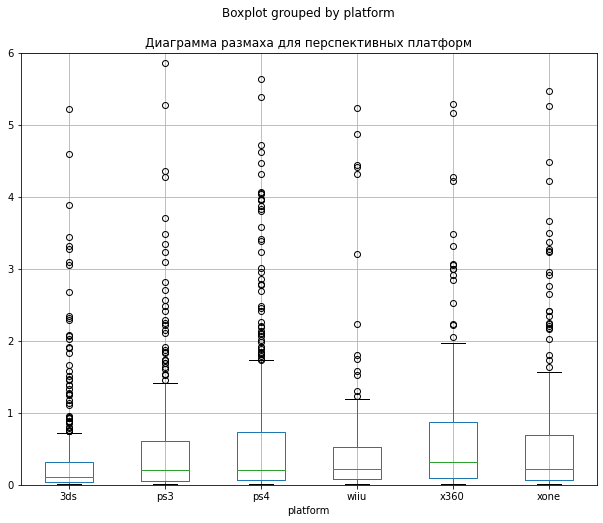

In [33]:
df_perspective = still_actual.query('year_of_release >=2012 and platform in ["ps4","ps3","x360","3ds","xone","wiiu"]')
(
    df_perspective.boxplot ('sum_sales',by='platform', figsize = (10,8))
    .set_title('Диаграмма размаха для перспективных платформ')
)
plt.ylim(0,6)

(0.0, 2.0)

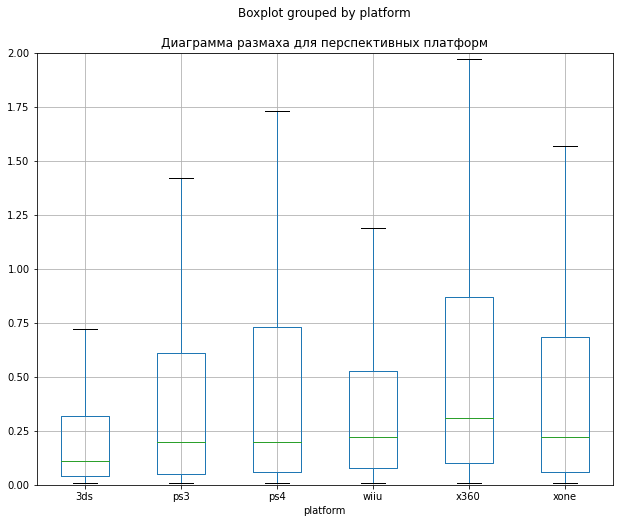

In [34]:
(
    df_perspective
    .boxplot ('sum_sales',by='platform', figsize = (10,8), showfliers=False)
    .set_title('Диаграмма размаха для перспективных платформ')
)

plt.ylim(0,2)

**Вывод**: разброс значений у платформ 3ds и wii наиболее плотный. Это характеризует игры, выпущенные на этой платформе как более предсказуемые по результату продаж. 

Медианное значение продаж у x360 наибольшее среди топ-6 платформ, а максимальное значение также наибольшее среди всех кандидатов, что говорит о перспективности этой платформы. 

### Корреляция оценки/ продажи

Изучим корреляцию между оценками пользователей/критиков и объемом продаж на примере платформы **ps4**.

0.23819940490624866
0.08821506349518947


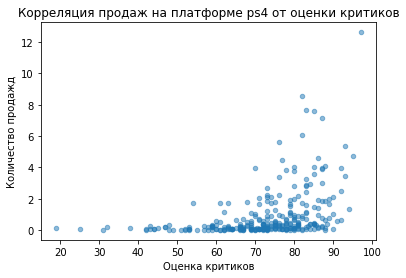

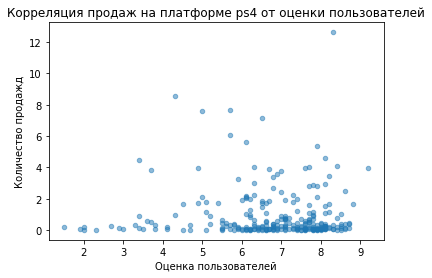

In [35]:
(
    df_perspective.query('platform == "ps4"')
    .plot(x ='critic_score',y ='sum_sales',kind = 'scatter', alpha = 0.5)
    .set_title('Корреляция продаж на платформе ps4 от оценки критиков')
)
plt.xlabel('Оценка критиков', fontsize=10)
plt.ylabel('Количество продажд', fontsize=10)

print(df['critic_score'].corr(df['sum_sales']))

(
    df_perspective.query('platform == "ps4"')
    .plot(x ='user_score',y ='sum_sales',kind = 'scatter', alpha = 0.5)
    .set_title('Корреляция продаж на платформе ps4 от оценки пользователей')
)
plt.xlabel('Оценка пользователей', fontsize=10)
plt.ylabel('Количество продажд', fontsize=10)

print(df['user_score'].corr(df['sum_sales']))

**Вывод**: корреляция между оценками пользователей и количеством продаж пренебрежительно мала.

Корреляция между оценками критиков и количеством продаж выше, и она так же прямая, но, тем не менее, она крайне незначительна.

Можно утверждать о том, что оценки пользователей и критиков не влияют на количество продаж видеоигр. 

Изучим корреляцию оценок критиков/пользователей и количества продаж для всех платформ из топ-6. 

'Коэффициент корреляции продаж на платформе ps3 от оценки пользователей:'

,user_score,sum_sales
user_score,1.000000,-0.005043
sum_sales,-0.005043,1.000000


'Коэффициент корреляции продаж на платформе x360 от оценки пользователей:'

,user_score,sum_sales
user_score,1.000000,0.006315
sum_sales,0.006315,1.000000


'Коэффициент корреляции продаж на платформе 3ds от оценки пользователей:'

,user_score,sum_sales
user_score,1.00000,0.19815
sum_sales,0.19815,1.00000


'Коэффициент корреляции продаж на платформе xone от оценки пользователей:'

,user_score,sum_sales
user_score,1.000000,-0.068925
sum_sales,-0.068925,1.000000


'Коэффициент корреляции продаж на платформе wiiu от оценки пользователей:'

,user_score,sum_sales
user_score,1.000000,0.400219
sum_sales,0.400219,1.000000


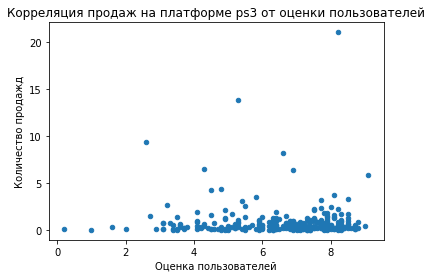

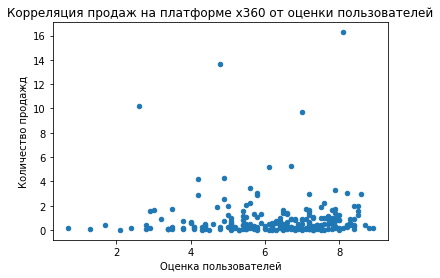

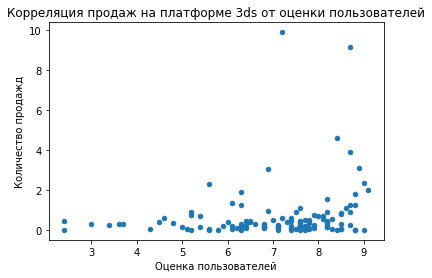

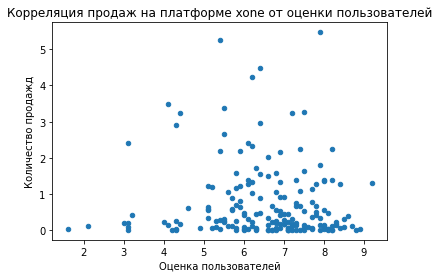

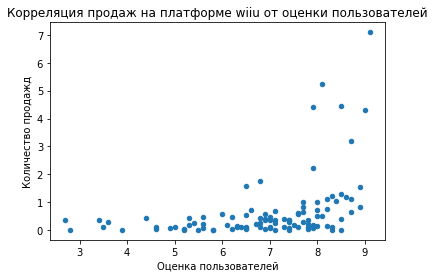

In [36]:
for platform in ["ps3","x360","3ds","xone","wiiu"]:
    df_perspective[df_perspective['platform'] == platform].plot(x='user_score', y='sum_sales', kind='scatter')
    plt.title(f'Корреляция продаж на платформе {platform} от оценки пользователей', fontsize=12)
    plt.xlabel('Оценка пользователей', fontsize=10)
    plt.ylabel('Количество продажд', fontsize=10)
    display(f'Коэффициент корреляции продаж на платформе {platform} от оценки пользователей:', 
            df_perspective[df_perspective['platform'] == platform][['user_score','sum_sales']].corr())

**Вывод**: оценки пользователей не коррелируют с объемом продаж ни для одной из топ-6 платформ.

Тем не менее, следует обратить внимание: оценки пользователей на wiiu имеют некоторую не пренебрежительно малую корреляцию с объемом продаж. 

'Коэффициент корреляции продаж на платформе ps4 от оценки критиков:'

,critic_score,sum_sales
critic_score,1.00000,0.39089
sum_sales,0.39089,1.00000


'Коэффициент корреляции продаж на платформе ps3 от оценки критиков:'

,critic_score,sum_sales
critic_score,1.000000,0.306495
sum_sales,0.306495,1.000000


'Коэффициент корреляции продаж на платформе x360 от оценки критиков:'

,critic_score,sum_sales
critic_score,1.00000,0.32285
sum_sales,0.32285,1.00000


'Коэффициент корреляции продаж на платформе 3ds от оценки критиков:'

,critic_score,sum_sales
critic_score,1.000000,0.290567
sum_sales,0.290567,1.000000


'Коэффициент корреляции продаж на платформе xone от оценки критиков:'

,critic_score,sum_sales
critic_score,1.000000,0.374384
sum_sales,0.374384,1.000000


'Коэффициент корреляции продаж на платформе wiiu от оценки критиков:'

,critic_score,sum_sales
critic_score,1.000000,0.324624
sum_sales,0.324624,1.000000


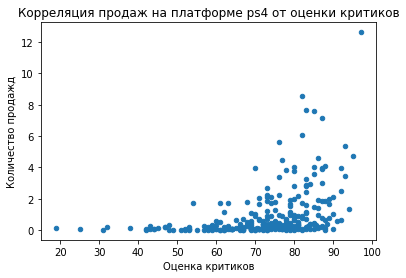

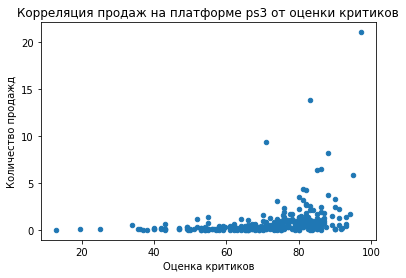

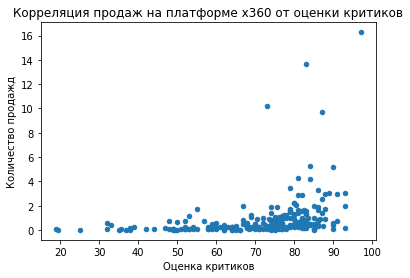

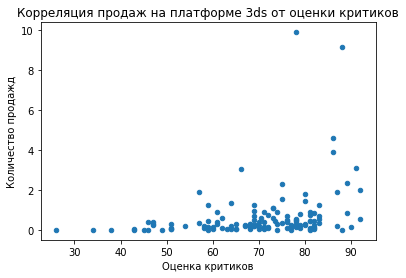

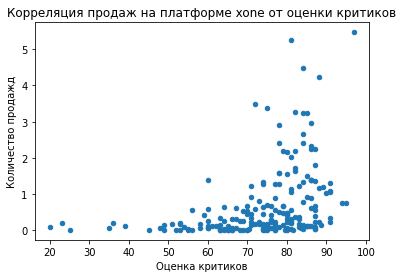

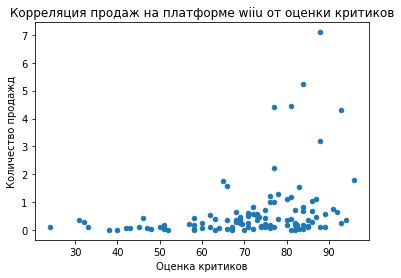

In [37]:
for platform in ["ps4","ps3","x360","3ds","xone","wiiu"]:
    df_perspective[df_perspective['platform'] == platform].plot(x='critic_score', y='sum_sales', kind='scatter')
    plt.title(f'Корреляция продаж на платформе {platform} от оценки критиков', fontsize=12)
    plt.xlabel('Оценка критиков', fontsize=10)
    plt.ylabel('Количество продажд', fontsize=10)
    display(f'Коэффициент корреляции продаж на платформе {platform} от оценки критиков:', 
            df_perspective[df_perspective['platform'] == platform][['critic_score','sum_sales']].corr())

**Вывод**: существует крайне слабая прямая зависимость между оценкой критиков и объемом продаж, в среднем, среди топ-6 платформ (сила связи очень слабая). Однако, судя по графику, она обусловлена скорее выбросами, чем трендом. Полагаться на оценку критиков при прогнозировании объемов продаж так же не стоит. 

## Прибыльные жанры

Изучим самые популярные жанры игр на топ-6 платформах.

Text(0, 0.5, 'Продажи, млн копий')

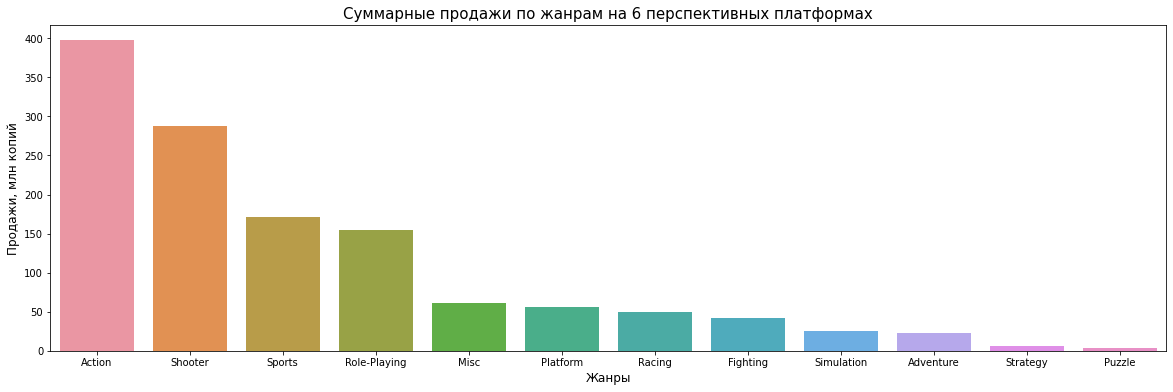

In [38]:
top_genres = df_perspective.pivot_table(index='genre', values='sum_sales', aggfunc='sum').sort_values(
    by='sum_sales', ascending=False).reset_index().rename_axis(None, axis=1)


plt.figure(figsize=(20,6))
plt.title('Суммарные продажи по жанрам на 6 перспективных платформах',fontsize=15)
sns.barplot(data=top_genres, x='genre', y='sum_sales')
plt.xlabel('Жанры',fontsize=12)
plt.ylabel('Продажи, млн копий',fontsize=12)

**Вывод**: по количеству продаж (млн копий) наиболее популярны игры в жанрах экшен, шутер, спорт, РПГ.

Не будем спешить с выводами: популярность некоторых жанров может быть обусловлена выбросами от хитов. 

Text(0, 0.5, 'Продажи')

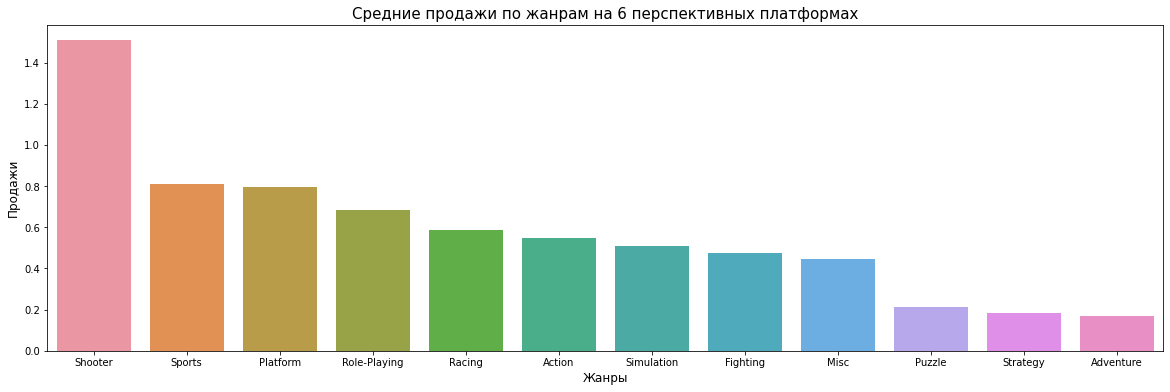

In [39]:
top_genres = df_perspective.pivot_table(index='genre', values='sum_sales', aggfunc='mean').sort_values(
    by='sum_sales', ascending=False).reset_index().rename_axis(None, axis=1)


plt.figure(figsize=(20,6))
plt.title('Средние продажи по жанрам на 6 перспективных платформах',fontsize=15)
sns.barplot(data=top_genres, x='genre', y='sum_sales')
plt.xlabel('Жанры',fontsize=12)
plt.ylabel('Продажи',fontsize=12)

**Вывод**: теперь мы можем более ответственно заявить, что наиболее популярны на топ-6 платформах игры в жанрах: шутер, платформеры, спорт, РПГ, гонки и экшен. Наименее популярны стратегии :(((((( и адвентуры. 

Повторно изучим датафрейм перспективных платформ. 

In [40]:
display(df_perspective.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,ps3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,x360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,ps4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3ds,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,Call of Duty: Black Ops II,ps3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


## Разрезы по регионам

Изучим самые популярные платформы на рынках eu, na и jp. 

In [41]:
df_actual = df.query('year_of_release > 2012')
df_regions = df_actual.pivot_table(index=['platform'], 
                                        values=['na_sales','eu_sales','jp_sales'], 
                                        aggfunc='sum').reset_index().rename_axis(None, axis=1)

display(df_regions)

,platform,eu_sales,jp_sales,na_sales
0,3ds,30.96,67.81,38.20
1,ds,0.85,0.00,0.57
2,pc,25.84,0.00,11.19
3,ps3,67.81,23.35,63.50
4,ps4,141.09,15.96,108.74
5,psp,0.17,3.53,0.00
6,psv,6.10,18.59,5.04
7,wii,5.93,0.05,6.56
8,wiiu,19.85,10.88,29.21
9,x360,42.52,0.51,81.66


,platform,eu_sales,jp_sales,na_sales,eu_sales_share,jp_sales_share,na_sales_share
0,3ds,30.96,67.81,38.20,0.226035,0.495072,0.278893
1,ds,0.85,0.00,0.57,0.598592,0.000000,0.401408
2,pc,25.84,0.00,11.19,0.697813,0.000000,0.302187
3,ps3,67.81,23.35,63.50,0.438446,0.150976,0.410578
4,ps4,141.09,15.96,108.74,0.530833,0.060047,0.409120
5,psp,0.17,3.53,0.00,0.045946,0.954054,0.000000
6,psv,6.10,18.59,5.04,0.205180,0.625294,0.169526
7,wii,5.93,0.05,6.56,0.472887,0.003987,0.523126
8,wiiu,19.85,10.88,29.21,0.331164,0.181515,0.487321
9,x360,42.52,0.51,81.66,0.341006,0.004090,0.654904


Text(0, 0.5, 'Доля')

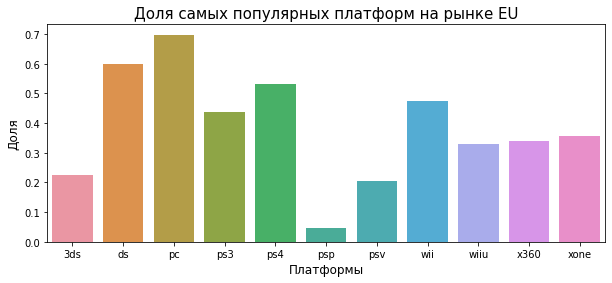

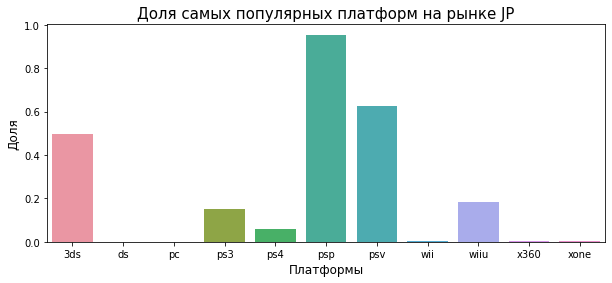

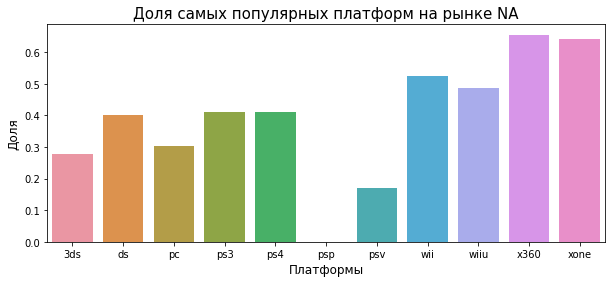

In [42]:
df_regions['eu_sales_share'] = df_regions['eu_sales']/(df_regions['eu_sales']+df_regions['jp_sales']+df_regions['na_sales'])
df_regions['jp_sales_share'] = df_regions['jp_sales']/(df_regions['eu_sales']+df_regions['jp_sales']+df_regions['na_sales'])
df_regions['na_sales_share'] = df_regions['na_sales']/(df_regions['eu_sales']+df_regions['jp_sales']+df_regions['na_sales'])
display(df_regions)

plt.figure(figsize=(10,4))
plt.title('Доля самых популярных платформ на рынке EU',fontsize=15)
sns.barplot(data=df_regions, x='platform', y='eu_sales_share')
plt.xlabel('Платформы',fontsize=12)
plt.ylabel('Доля',fontsize=12)

plt.figure(figsize=(10,4))
plt.title('Доля самых популярных платформ на рынке JP',fontsize=15)
sns.barplot(data=df_regions, x='platform', y='jp_sales_share')
plt.xlabel('Платформы',fontsize=12)
plt.ylabel('Доля',fontsize=12)

plt.figure(figsize=(10,4))
plt.title('Доля самых популярных платформ на рынке NA',fontsize=15)
sns.barplot(data=df_regions, x='platform', y='na_sales_share')
plt.xlabel('Платформы',fontsize=12)
plt.ylabel('Доля',fontsize=12)

**Вывод**: на рынке eu преобладает ps4 и pc. В целом, платформы достаточно равномерно распределили количество продаж.

На рынке jp доминирует psp, psv и 3ds. Остальные платформы не очень популярны. Особенно обращает на себя внимание то, что x360 и xone очень сильно просели в регионе. 

На рынке na, наоборот, наибольшим спросом пользуются x360, ds и xone. 

Изучим продажи по регионам по жанрам. 

In [43]:
df_genres = df_actual.pivot_table(index='genre', 
                                      values = ['na_sales', 'eu_sales', 'jp_sales'],
                                      aggfunc = 'sum')
df_genres['3_regions_sales'] = df_genres['eu_sales'] + df_genres['jp_sales'] + df_genres['na_sales']
display(df_genres)

,eu_sales,jp_sales,na_sales,3_regions_sales
genre,,,,
Action,118.61,40.49,126.13,285.23
Adventure,8.25,5.82,7.14,21.21
Fighting,8.55,7.65,15.55,31.75
Misc,20.04,9.44,27.49,56.97
Platform,15.58,4.79,18.14,38.51
Puzzle,1.00,1.18,0.83,3.01
Racing,20.19,2.30,12.96,35.45
Role-Playing,36.97,51.04,46.40,134.41
Shooter,87.86,6.61,109.74,204.21


Text(0, 0.5, 'Продажи')

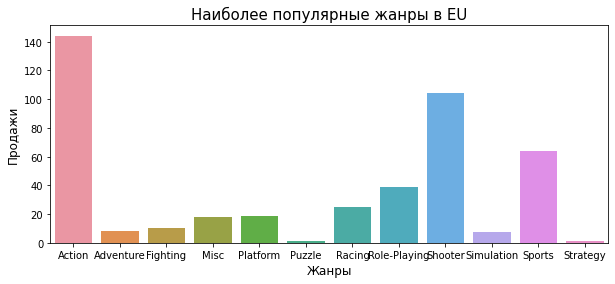

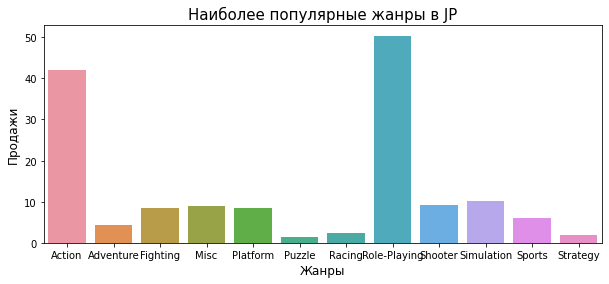

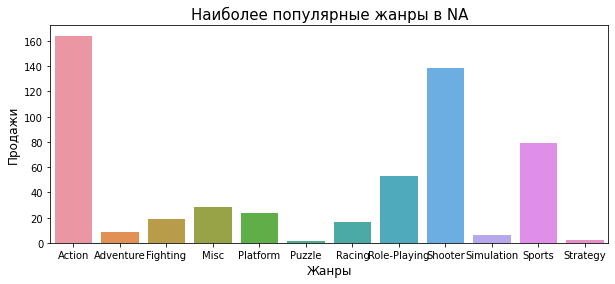

In [44]:
df_genres = df_perspective.pivot_table(index='genre', 
                                      values = ['na_sales', 'eu_sales', 'jp_sales'],
                                      aggfunc = 'sum',
                                      ).reset_index().rename_axis(None, axis=1)

plt.figure(figsize=(10,4))
plt.title('Наиболее популярные жанры в EU',fontsize=15)
sns.barplot(data=df_genres, x='genre', y='eu_sales')
plt.xlabel('Жанры',fontsize=12)
plt.ylabel('Продажи',fontsize=12)

plt.figure(figsize=(10,4))
plt.title('Наиболее популярные жанры в JP',fontsize=15)
sns.barplot(data=df_genres, x='genre', y='jp_sales')
plt.xlabel('Жанры',fontsize=12)
plt.ylabel('Продажи',fontsize=12)

plt.figure(figsize=(10,4))
plt.title('Наиболее популярные жанры в NA',fontsize=15)
sns.barplot(data=df_genres, x='genre', y='na_sales')
plt.xlabel('Жанры',fontsize=12)
plt.ylabel('Продажи',fontsize=12)

**Вывод**: наиболее популярны на рынке eu игры жанра экшен, шутер и спорт. Отстают РПГ и гонки. Доля остальных жанров незначительная. 

На рынке jp доминирующим присутствием отметились игры жанр РПГ и экшены. 

На рынке na топ 4 (в порядке убывания популярности): экшены, шутеры, спорт, РПГ. 

### Возрастной ценз ESRB

Проверим, влияет ли возрастной ценз ESRB на количество проданных копий по регионам. 

«EC» («Early childhood») — «Для детей младшего возраста»

«E» («Everyone») — «Для всех»

«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»

«T» («Teen») — «Подросткам»

«M» («Mature») — «Для взрослых»

«AO» («Adults Only 18+») — «Только для взрослых»

«RP» («Rating Pending») — «Рейтинг ожидается»


In [45]:
df['rating'] = df['rating'].fillna('unavailable')

,rating,sum,percentage
1,E,1288.00,29.451646
8,unavailable,1229.15,28.105971
7,T,751.26,17.178450
5,M,746.95,17.079897
2,E10+,352.56,8.061702
4,K-A,2.56,0.058537
3,EC,1.53,0.034985
0,AO,1.26,0.028811
6,RP,0.00,0.000000


Text(0, 0.5, 'Рейтинг')

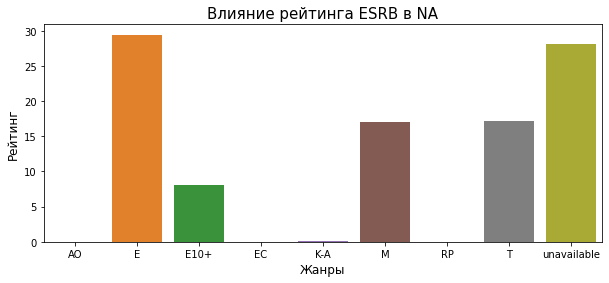

In [46]:
df_rating_na = df.groupby('rating').na_sales.agg(['sum'])
df_rating_na['percentage'] = df_rating_na['sum']/df_rating_na['sum'].sum()*100
df_rating_na = df_rating_na.reset_index().rename_axis(None, axis=1)
display(df_rating_na.sort_values(by='sum',ascending=False))

rating = ['E','unavailable','T','M','E10+','K-A','EC','AO','RP']
percentage = df_rating_na['percentage']

plt.figure(figsize=(10,4))
plt.title('Влияние рейтинга ESRB в NA',fontsize=15)
sns.barplot(data=df_rating_na, x='rating', y='percentage')
plt.xlabel('Жанры',fontsize=12)
plt.ylabel('Рейтинг',fontsize=12)

**Вывод**: наиболее популярны на рынке na игры с маркером E, то есть для всех. Чуть менее популярны М (для взрослых) и T (для подростков). Игры остальных категорий продаются крайне слабо. Но стоит отметить, что значительное число игр в датасете не имеют маркировку по регионы, поэтому окончательные выводы можно сделать только тогда, когда датасет будет заполнен. 

,rating,sum,percentage
1,E,709.20,29.357950
8,unavailable,610.40,25.268038
5,M,483.17,20.001242
7,T,423.56,17.533634
2,E10+,188.34,7.796498
0,AO,0.61,0.025251
4,K-A,0.27,0.011177
3,EC,0.11,0.004554
6,RP,0.04,0.001656


Text(0, 0.5, 'Рейтинг')

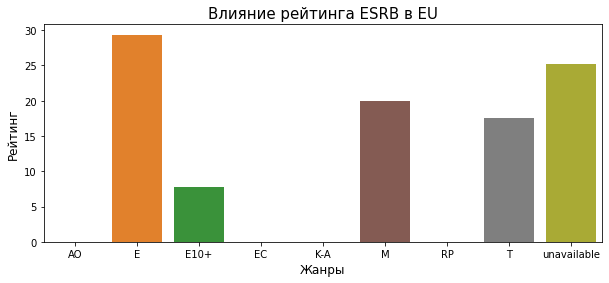

In [47]:
df_rating_eu = df.groupby('rating').eu_sales.agg(['sum'])
df_rating_eu['percentage'] = df_rating_eu['sum']/df_rating_eu['sum'].sum()*100
df_rating_eu = df_rating_eu.reset_index().rename_axis(None, axis=1)
display(df_rating_eu.sort_values(by='sum',ascending=False))

rating = ['E','unavailable','T','M','E10+','K-A','EC','AO','RP']
percentage = df_rating_eu['percentage']

plt.figure(figsize=(10,4))
plt.title('Влияние рейтинга ESRB в EU',fontsize=15)
sns.barplot(data=df_rating_eu, x='rating', y='percentage')
plt.xlabel('Жанры',fontsize=12)
plt.ylabel('Рейтинг',fontsize=12)

**Вывод**: в регоине eu картина практически не отличается от na, за исключением того, что неожиданно много копий продано в категории E10+. По-прежнему, оценок недостаточно, чтобы сделать окончательные выводы. 

,rating,sum,percentage
8,unavailable,838.39,64.862753
1,E,198.02,15.319985
7,T,150.88,11.672959
5,M,63.61,4.921242
2,E10+,40.20,3.110107
4,K-A,1.46,0.112954
0,AO,0.00,0.000000
3,EC,0.00,0.000000
6,RP,0.00,0.000000


Text(0, 0.5, 'Рейтинг')

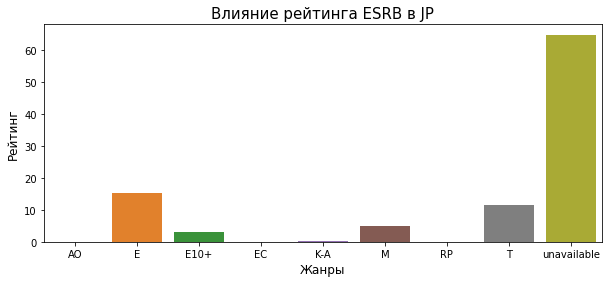

In [48]:
df_rating_jp = df.groupby('rating').jp_sales.agg(['sum'])
df_rating_jp['percentage'] = df_rating_jp['sum']/df_rating_jp['sum'].sum()*100
df_rating_jp = df_rating_jp.reset_index().rename_axis(None, axis=1)
display(df_rating_jp.sort_values(by='sum',ascending=False))

rating = ['E','unavailable','T','M','E10+','K-A','EC','AO','RP']
percentage = df_rating_jp['percentage']

plt.figure(figsize=(10,4))
plt.title('Влияние рейтинга ESRB в JP',fontsize=15)
sns.barplot(data=df_rating_jp, x='rating', y='percentage')
plt.xlabel('Жанры',fontsize=12)
plt.ylabel('Рейтинг',fontsize=12)

**Вывод**: подавляющее число игр в регионе jp, по всей видимости, выпускаются местными студиями и не расчитаны на внешний рынок, а потому вовсе не имеют оценки ESRB. 

## Проверка гипотез

Дропнем строки с пропусками в оценке пользователей, чтобы можно было считать среднее.

In [49]:
df_actual = df_actual.dropna(subset=['user_score']) 
print(len(df_actual[df_actual['user_score'].isna()]))

0


### Гипотеза 1

H0 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H1 - Средние пользовательские рейтинги платформ Xbox One и PC разные

In [50]:
alpha = .05 

results = st.ttest_ind(
    df_actual.query('platform == "xone"')['user_score'], 
    df_actual.query('platform == "pc"')['user_score']
)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.15503167687396294
Не получилось отвергнуть нулевую гипотезу


**Вывод**: статистика дает основание предполагать, что нулевая гипотеза неверна. 

### Гипотеза 2 

H0 - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые

H1 - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

In [51]:
alpha = .05 

results = st.ttest_ind(
    df_actual.query('genre == "Action"')['user_score'], 
    df_actual.query('genre == "Sports"')['user_score']
)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 8.11729623919141e-28
Отвергаем нулевую гипотезу


**Вывод**: статистика дает основание предполагать, что нулевая гипотеза неверна. 

## Общий вывод

**Интро:** расцвет игровой индустрии пришелся на 90-е, а настоящий бум - на 2009-2010, после чего произошел небольшой спад с последующим повторным увеличением количества выпуска игр. 

**Самые успешные платформы в истории:** можно выделить 6 платформ, на которых было продано наибольшее число копий (за все время наблюдений), а именно: ps2, x360, ps3, wii, ds, ps. 

*Жизненный цикл платформы - 9 лет
Актуальный период платформы - 4 года*

**Самые актуальные платформы:** в период актуальности платформы лидеры среди платформ сменились: особенно успешно себя показали ps4, ps3, x360, 3ds, xone и wiiu.

**Плотность распределения по платформам:** разброс значений у платформ 3ds и wii наиболее плотный. Это характеризует игры, выпущенные на этой платформе как более предсказуемые по результату продаж. 

Медианное значение продаж у x360 наибольшее среди топ-6 платформ, а максимальное значение также наибольшее среди всех кандидатов, что говорит о перспективности этой платформы. 

**Слушать ли критиков и пользователей?** Корреляция между оценками пользователей и количеством продаж пренебрежительно мала.

Корреляция между оценками критиков и количеством продаж выше, и она так же прямая, но, тем не менее, она крайне незначительна.

Можно утверждать о том, что оценки пользователей и критиков не влияют на количество продаж видеоигр. 

**Популярные жанры:** наиболее популярны на топ-6 платформах игры в жанрах: шутер, платформеры, спорт, РПГ, гонки и экшен. Наименее популярны стратегии :(((((( и адвентуры. 

**Платформы на разных рынках:** на рынке eu преобладает ps4 и ps3. В целом, платформы достаточно равномерно распределили количество продаж.

На рынке jp доминирует psp, psv и 3ds. Остальные платформы не очень популярны. Особенно обращает на себя внимание то, что x360 и xone очень сильно просели в регионе. 

На рынке na, наоборот, наибольшим спросом пользуются x360 и xone. 

**Жанры на разных рынках:** наиболее популярны на рынке eu игры жанра экшен, шутер и спорт. Отстают РПГ и гонки. Доля остальных жанров незначительная. 

На рынке jp доминирующим присутствием отметились игры жанр РПГ и экшены. 

На рынке na топ 4 (в порядке убывания популярности): экшены, шутеры, спорт, РПГ.

**Рейтинг ESRB** практически не влияет на объемы продаж по регионам (а в jp так вообще большинство игр не имеют этой оценки).

**Гипотезы**

Гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, - после анализа статистики не подтверждена. 

Гипотеза о том, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные, - после анализа статистики не отвергнута. 